In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv', delimiter=',')

In [4]:
df1.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
features = df1.iloc[:,:-1]

In [6]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [7]:
labels = df1.iloc[:,[33]]

In [8]:
labels.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [9]:
features.shape


(26707, 33)

In [10]:
labels.shape

(26707, 1)

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [13]:
features.duplicated().sum()

0

In [14]:
labels.duplicated().sum()

26705

In [15]:
features.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [16]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

In [17]:
features = features.fillna(features.mean())
features = round(features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [18]:
features.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [19]:
features.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [20]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

In [21]:
features = features.fillna(features.mean())
features = round(features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [22]:
features.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [23]:
features = features.fillna('No Category')

In [24]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [25]:
print("h1n1_worry")
print(features.h1n1_worry.unique())

print("h1n1_awareness")
print(features.h1n1_awareness.unique())

print("antiviral_medication")
print(features.antiviral_medication.unique())

print("contact_avoidance")
print(features.contact_avoidance.unique())

print("bought_face_mask")
print(features.bought_face_mask.unique())

print("wash_hands_frequently")
print(features.wash_hands_frequently.unique())
print("h1n1_worry")
print(features.h1n1_worry.unique())

print("avoid_large_gatherings")
print(features.avoid_large_gatherings.unique())

print("reduced_outside_home_cont")
print(features.reduced_outside_home_cont.unique())

print("avoid_touch_face")
print(features.avoid_touch_face.unique())

print("dr_recc_h1n1_vacc")
print(features.dr_recc_h1n1_vacc.unique())

print("dr_recc_seasonal_vacc")
print(features.dr_recc_seasonal_vacc.unique())

print("chronic_medic_condition")
print(features.chronic_medic_condition.unique())

print("cont_child_undr_6_mnths")
print(features.cont_child_undr_6_mnths.unique())

print("is_health_worker")
print(features.is_health_worker.unique())
print("has_health_insur")
print(features.has_health_insur.unique())

print("is_h1n1_vacc_effective")
print(features.is_h1n1_vacc_effective.unique())

print("is_h1n1_risky")
print(features.is_h1n1_risky.unique())

print("sick_from_h1n1_vacc")
print(features.sick_from_h1n1_vacc.unique())

print("is_seas_vacc_effective")
print(features.is_seas_vacc_effective.unique())

print("is_seas_risky")
print(features.is_seas_risky.unique())

print("sick_from_seas_vacc")
print(features.sick_from_seas_vacc.unique())

h1n1_worry
[1. 3. 2. 0.]
h1n1_awareness
[0. 2. 1.]
antiviral_medication
[0. 1.]
contact_avoidance
[0. 1.]
bought_face_mask
[0. 1.]
wash_hands_frequently
[0. 1.]
h1n1_worry
[1. 3. 2. 0.]
avoid_large_gatherings
[0. 1.]
reduced_outside_home_cont
[1. 0.]
avoid_touch_face
[1. 0.]
dr_recc_h1n1_vacc
[0. 1.]
dr_recc_seasonal_vacc
[0. 1.]
chronic_medic_condition
[0. 1.]
cont_child_undr_6_mnths
[0. 1.]
is_health_worker
[0. 1.]
has_health_insur
[1. 0.]
is_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
is_h1n1_risky
[1. 4. 3. 2. 5.]
sick_from_h1n1_vacc
[2. 4. 1. 5. 3.]
is_seas_vacc_effective
[2. 4. 5. 3. 1.]
is_seas_risky
[1. 2. 4. 3. 5.]
sick_from_seas_vacc
[2. 4. 1. 5. 3.]


In [26]:
print("age_bracket")
print(features.age_bracket.unique())

print("qualification")
print(features.qualification.unique())

print("race")
print(features.race.unique())

print("sex")
print(features.sex.unique())

print("income_level")
print(features.income_level.unique())

print("marital_status")
print(features.marital_status.unique())

print("housing_status")
print(features.housing_status.unique())

print("employment")
print(features.employment.unique())

print("census_msa")
print(features.census_msa.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
sex
['Female' 'Male']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
housing_status
['Own' 'Rent' 'No Category']
employment
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [29]:
enc = LabelEncoder()

In [30]:
features.age_bracket = enc.fit_transform(features.age_bracket)
features.qualification = enc.fit_transform(features.qualification)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_level = enc.fit_transform(features.income_level)
features.marital_status = enc.fit_transform(features.marital_status)
features.housing_status = enc.fit_transform(features.housing_status)
features.employment = enc.fit_transform(features.employment)
features.census_msa = enc.fit_transform(features.census_msa)

In [28]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [31]:
features.head(20)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4,3,0,0,0,1,0,0,1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,3,1,0,0,1,0,1,2.0,3.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,1,0,2,1,0,0,0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4,3,0,0,0,1,0,2,2.0,0.0
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2,3,1,1,0,1,0,0,1.0,0.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,3,1,0,2,1,2,0,0.0,0.0


In [32]:
features.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


In [33]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers) 

In [34]:
print(len(findoutliers(features.no_of_adults)))
print(len(findoutliers(features.no_of_children)))

1125
1747


In [35]:
findoutliers(features.no_of_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [36]:
findoutliers(features.no_of_children)

array([3., 3., 3., ..., 3., 3., 3.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


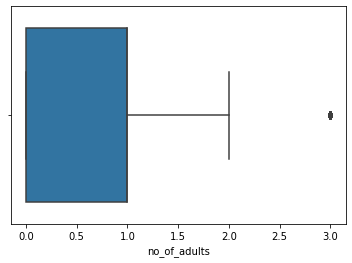

In [37]:
sns.boxplot(features.no_of_adults)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


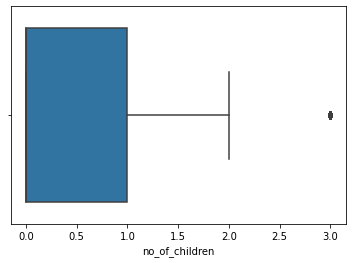

In [38]:
sns.boxplot(features.no_of_children)

In [39]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [40]:
features = pd.DataFrame(features)
col_name = ['unique_id','h1n1_worry','h1n1_awareness',
            'antiviral_medication','contact_avoidance',
            'bought_face_mask','wash_hands_frequently',
            'avoid_large_gatherings','reduced_outside_home_cont',
            'avoid_touch_face','dr_recc_h1n1_vacc',
            'dr_recc_seasonal_vacc','chronic_medic_condition',
            'cont_child_undr_6_mnths','is_health_worker',
            'has_health_insur','is_h1n1_vacc_effective','is_h1n1_risky'
            ,'sick_from_h1n1_vacc','is_seas_vacc_effective',
            'is_seas_risky','sick_from_seas_vacc','age_bracket',
            'qualification','race','sex','income_level',
            'marital_status','housing_status','employment','census_msa'
            ,'no_of_adults','no_of_children']

In [41]:
features.columns = col_name

In [42]:
x = features
y = labels

In [44]:
x=x.drop(['unique_id'],axis=1)

In [46]:
x

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.25,1.000000,0.0,0.666667,1.0,0.5,0.666667,1.0,0.000000,0.0
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.00,1.000000,1.0,0.666667,1.0,1.0,0.000000,0.0,0.000000,0.0
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.000000,1.0,0.000000,1.0,0.5,0.000000,0.0,0.666667,0.0
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.00,1.000000,0.0,0.666667,1.0,1.0,0.666667,0.5,0.000000,0.0
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.00,1.000000,0.0,0.000000,0.0,0.5,0.000000,0.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.00,1.000000,0.0,0.000000,1.0,0.5,0.666667,1.0,0.000000,0.0
26703,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.50,1.000000,1.0,0.000000,1.0,1.0,0.000000,0.5,0.333333,0.0
26704,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.00,1.000000,0.0,1.000000,1.0,0.5,0.333333,0.0,0.000000,0.0
26705,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.00,0.333333,0.0,0.000000,0.0,1.0,0.000000,1.0,0.333333,0.0


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [48]:
x_train

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
26181,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.25,0.0,1.0,0.666667,1.0,1.0,0.000000,0.5,0.333333,0.000000
24965,0.666667,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.00,1.0,0.0,0.333333,0.0,0.5,0.666667,0.5,1.000000,0.000000
17856,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,1.0,1.0,0.333333,0.0,0.5,0.000000,0.5,0.333333,0.666667
10353,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.50,1.0,0.0,0.000000,1.0,0.5,0.666667,0.5,0.000000,0.000000
21029,0.666667,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.00,1.0,0.0,0.333333,0.0,0.5,0.000000,0.0,1.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.00,1.0,0.0,0.000000,0.0,0.5,0.666667,0.0,0.333333,1.000000
17289,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.50,1.0,0.0,0.000000,0.5,0.5,0.000000,0.0,0.000000,0.333333
5192,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.50,1.0,0.0,0.000000,0.0,0.5,0.000000,0.0,0.333333,0.000000
12172,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.00,1.0,0.0,0.000000,1.0,0.5,0.000000,1.0,0.000000,0.000000


In [49]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9999465069006098
0.7485336328466242


In [51]:
from sklearn import tree
from os import system
from sklearn.metrics import r2_score
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

In [53]:
from sklearn import tree
from os import system
from sklearn.metrics import r2_score
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

                                Imp
h1n1_worry                 0.037571
h1n1_awareness             0.031405
antiviral_medication       0.006481
contact_avoidance          0.017895
bought_face_mask           0.009971
wash_hands_frequently      0.014955
avoid_large_gatherings     0.017189
reduced_outside_home_cont  0.018441
avoid_touch_face           0.019254
dr_recc_h1n1_vacc          0.153347
dr_recc_seasonal_vacc      0.016353
chronic_medic_condition    0.021524
cont_child_undr_6_mnths    0.010414
is_health_worker           0.018880
has_health_insur           0.004386
is_h1n1_vacc_effective     0.057021
is_h1n1_risky              0.059870
sick_from_h1n1_vacc        0.040126
is_seas_vacc_effective     0.033231
is_seas_risky              0.037927
sick_from_seas_vacc        0.042705
age_bracket                0.048251
qualification              0.038996
race                       0.024731
sex                        0.021989
income_level               0.034499
marital_status             0

In [56]:
y_predict = dTree.predict(x_test)

In [57]:
y_predict


array([0, 0, 1, ..., 0, 1, 0])

In [58]:
pd.Series(y_predict).value_counts()

0    6197
1    1816
dtype: int64

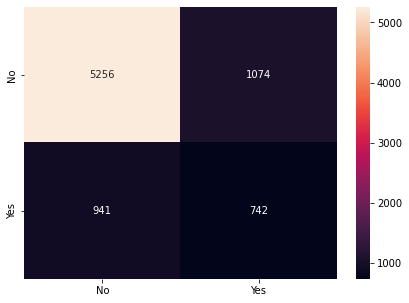

In [59]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [60]:
CC_DT = accuracy_score(y_test,y_predict)

In [61]:
CC_DT

0.7485336328466242

In [62]:
model_RF = RandomForestClassifier()



model_RF.fit(x_train,y_train)



y_pred_RF = model_RF.predict(x_test)


RF = accuracy_score(y_test,y_pred_RF)
RF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8412579558217896

In [63]:
y_pred_RF

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
pd.Series(y_pred_RF).value_counts()

0    7016
1     997
dtype: int64